# Working with **Parquet files**

In [11]:
from polymesh.examples import stand_vtk
from neumann.array import minmax
import numpy as np

mesh = stand_vtk(read=True)
F = -10.0

In [12]:
mesh.centralize()
mesh.move(np.array([0., 0., -mesh.coords()[:, 2].min()]))
coords = mesh.coords()
zmin, zmax = minmax(coords[:, 2])
h = zmax - zmin
zmin, zmax, h

(0.0, 119.99898554822028, 119.99898554822028)

In [13]:
i_f = np.where(coords[:, 2]>=0.998*h)[0]
i_u = np.where(coords[:, 2]<=0.002*h)[0]

f = F * np.array([0., 0., 1, 0., 0., 0.]) / len(i_f)
loads = np.zeros((coords.shape[0], 6), dtype=float)
loads[i_f] = f
assert F == np.sum(loads)

fixity = np.zeros((coords.shape[0], 6), dtype=bool)
fixity[i_u] = True

In [14]:
mesh.pd['loads'] = loads
mesh.pd['fixity'] = fixity
mesh.pd.to_parquet('stand_pointdata.parquet')
list(mesh.cellblocks())[0].cd.to_parquet('stand_celldata.parquet')

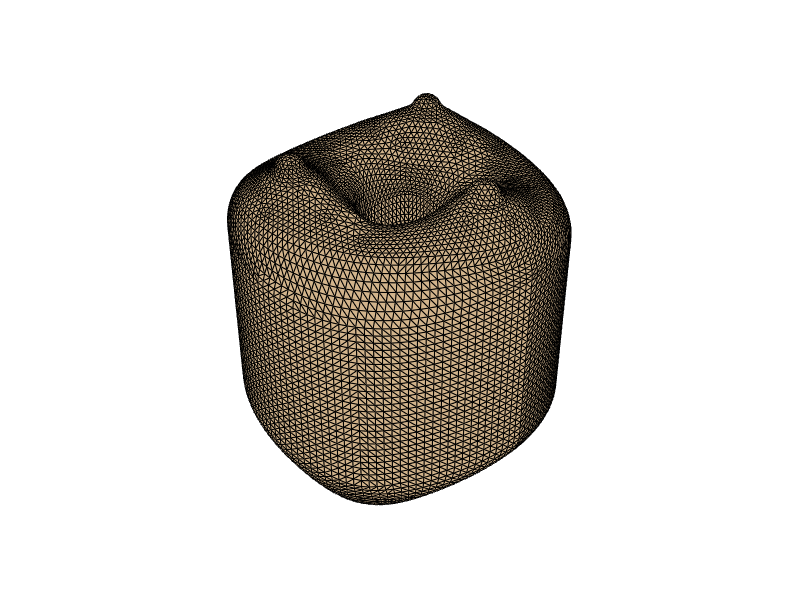

In [15]:
mesh.pvplot(notebook=True, jupyter_backend='static', window_size=(800, 600))

In [16]:
import awkward as ak

ak.from_parquet('stand.parquet')['fixity']

<Array [[False, False, ... False, False]] type='65623 * var * bool'>